# **Pipeline, CrossValidation & GridSearch**

- All You Need To Know

We will draw couple of plots during the lecture. We activate matplotlib to show the plots inline in the notebook.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import numpy as np
np.set_printoptions(suppress=True)
#Not using scientific numbers in numpy

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

`scikit-learn` provides state-of-the-art machine learning algorithms. 
These algorithms, however, cannot be directly used on raw data. Raw data needs to be preprocessed beforehand. Thus, besides machine learning algorithms, `scikit-learn` provides a set of preprocessing methods. Furthermore, `scikit-learn` provides connectors for pipelining these estimators (i.e., transformer, regressor, classifier, clusterer, etc.).

In this lecture, we will present the set of `scikit-learn` functionalities allowing for pipelining estimators, evaluating those pipelines, tuning those pipelines using hyper-parameters optimization, and creating complex preprocessing steps.

## 1. Basic use-case: train and test a classifier

For this first example, we will train and test a classifier on a dataset. We will use this example to recall the API of `scikit-learn`.

We will use the `digits` dataset which is a dataset of hand-written digits.

In [5]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y = True)

Each row in `X` contains the intensities of the 64 image pixels. For each sample in `X`, we get the ground-truth `y` indicating the digit written.

In [6]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The digit in the image is: 0


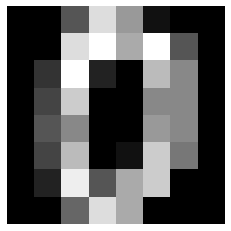

In [7]:
plt.imshow(X[0].reshape(8,8), cmap = 'gray');
plt.axis('off') #not showing the x axe
print(f'The digit in the image is: {y[0]}')

In machine learning, we should evaluate our model by training and testing it on distinct sets of data. `train_test_split` is a utility function to split the data into two independent sets. The `stratify` parameter enforces the classes distribution of the train and test datasets to be the same than the one of the entire dataset.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
# Stratify makes sure that the distribution remains consistant in training and test set
# Balance of classes remain the same

### <span style="color:red">**Stratify:** </span>


#### Stratify makes sure that the distribution remains consistant in training and test set 
- Balance of classes remain the same

- Always set `stratify = y`

Once we have independent training and testing sets, we can learn a machine learning model using the `fit` method. We will use the `score` method to test this method, relying on the default accuracy metric.

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 5000, random_state = 42)

### **penalty:**
- by default we have $l2$ penalty, elasticnet is the combination of $l1$ and $l2$

### **$C$:**

- is sepecifies the strength of the regularization but it's the opposite of $lambda$

### **tol:**

- the percision we want from the model to converge before stops the iterations

### **max_iter:**

- is the number of iterations before the model stops

### **n_jobs:**

- how many cores do you want to use? (-1 for the maximum core usage)

In [10]:
%%time
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f" accuracy score of the {clf.__class__.__name__} is {accuracy:0.2f}" )

 accuracy score of the LogisticRegression is 0.95
Wall time: 3.71 s


In [11]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class = 'ovo')
print(f"auc score of the {clf.__class__.__name__} is {auc:0.2f}" )

auc score of the LogisticRegression is 1.00


The API of `scikit-learn` is consistent across classifiers. Thus, we can easily replace the `LogisticRegression` classifier by a `RandomForestClassifier`. These changes are minimal and only related to the creation of the classifier instance.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
%%time
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f" accuracy score of the {clf.__class__.__name__} is {accuracy:0.2f}" )
%timeit

 accuracy score of the RandomForestClassifier is 0.96
Wall time: 469 ms


### Exercise

Do the following exercise:

* Load the breast cancer dataset. Import the functions `load_breast_cancer` from `sklearn.datasets`

In [14]:
from sklearn.datasets import load_breast_cancer
X_b, y_b = load_breast_cancer(return_X_y = True)

In [15]:
X_b.shape

(569, 30)

In [16]:
y_b[0]

0

In [17]:
np.unique(y_b)

array([0, 1])

### Binary classification probelm

* Split the dataset to keep 30% of it for testing using `sklearn.model_selection.train_test_split`. Make sure to stratify the data (i.e., use the `stratify` parameter) and set the `random_state` to `0`.

In [18]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.3, stratify = y_b, random_state = 0)

### Attention: Because we have `y_b` instead of `y`, for stratify also we need to write `stratify = y_b`

* Train a supervised classifier using the training data using GradientBoostingClassifier.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train_b, y_train_b)

* Use the fitted classifier to predict the classification labels for the testing set.

In [20]:
y_pred_b = clf_gb.predict(X_test_b)
y_pred_b

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

* Compute the balanced accuracy on the testing set. You need to import `balanced_accuracy_score` from `sklearn.metrics`

## **The balanced accuracy:**
- in binary and multiclass classification problems to deal with imbalanced datasets.

- It is defined as the average of recall obtained on each class.

- The best value is 1 and the worst value is 0 when `adjusted=False`

In [21]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

## **AUC:**

In [22]:
clf_gb.classes_

array([0, 1])

### This means that the 2nd column of `_pred_proba_b` is for class 1

`y_pred_proba_b = clf_gb.predict_proba(X_test_b)[:,1]`

>we must use the column belongs to the class with higher number for y_pred_proba in binary classification 

In [23]:
import sklearn.metrics as met
y_pred_proba_b = clf_gb.predict_proba(X_test_b)[:,1]
y_pred_proba_b
roc_auc_score(y_test_b, y_pred_proba_b)

0.9865654205607477

In [24]:
print(f"The balanced accuracy score is {balanced_accuracy_score(y_test_b, y_pred_b):0.3f}")
print(f"The mean accuracy score is     {clf_gb.score(X_test_b, y_test_b):0.3f}")
print(f"The AUC score is               {roc_auc_score(y_test_b, y_pred_proba_b):0.3f}")

The balanced accuracy score is 0.941
The mean accuracy score is     0.942
The AUC score is               0.987


## 2. More advanced use-case: preprocess the data before training and testing a classifier

### 2.1 Standardize your data

Preprocessing might be required before learning a model. For instance, a user could be interested in creating hand-crafted features or an algorithm might make some apriori assumptions about the data. 

In our case, the solver used by the `LogisticRegression` expects the data to be normalized. Thus, we need to standardize the data before training the model. To observe this necessary condition, we will check the number of iterations required to train the model.

In [25]:
%%time
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Required number of iteration to fit the model {clf.__class__.__name__}, {clf.n_iter_[0]}" )

Required number of iteration to fit the model LogisticRegression, 2366
Wall time: 3.21 s


The `MinMaxScaler` transformer is used to normalise the data. Other scalers include `StandardScaler`, `RobustScaler`, and `Normalizer`. The scaler should be applied in the following way: learn (i.e., `fit` method) the statistics on a training set and standardize (i.e., `transform` method) both the training and testing sets. Finally, we will train and test the model and the scaled datasets.

### StandardScaler:

$$ \frac{x - \mu}{\sigma} $$

$\mu$: mean of all $X$ values

$\sigma$: standrad deviation

### RobustScaler:

$$ \frac{x - M}{Q_3 - Q_1} $$

$M$: Median of all $X$ values

$Q_3 - Q_1$: 75% - 25% percentiles

### MinMaxScaler:
$$\frac{x -x_{min}} {x_{max} -x_{min}}$$

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_Scaled = scaler.fit_transform(X_train)
#Use X_train to find the min and max in the train dataset, and execute the scaler on train set

X_test_Scaled = scaler.transform(X_test)
#Then execute the scaling on test as well with the same scsler created out of X_train

clf.fit(X_train_Scaled, y_train)
accuracy = clf.score(X_test_Scaled, y_test)

print(f"The mean accuracy accuracy score is {accuracy:0.2f}")
print(f"Required number of iteration to fit the model {clf.__class__.__name__}: {clf.n_iter_[0]}" )

The mean accuracy accuracy score is 0.96
Required number of iteration to fit the model LogisticRegression: 186


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
#Use X_train to find the min and max in the train dataset, and execute the scaler on train set

X_test_Scaled = scaler.transform(X_test)
#Then execute the scaling on test as well with the same scsler created out of X_train

clf.fit(X_train_Scaled, y_train)
accuracy = clf.score(X_test_Scaled, y_test)

print(f"The mean accuracy score is {accuracy:0.3f}")
print(f"required number of iteration to fit the model {clf.__class__.__name__}is {clf.n_iter_[0]}" )

The mean accuracy score is 0.978
required number of iteration to fit the model LogisticRegressionis 89


By scaling the data, the convergence of the model happened much faster than with the unscaled data.

In [28]:
X_train[0]

array([ 0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 13., 16.,
        3.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
        3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,
        0.,  0.,  6., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,
        8., 11.,  5.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,  0.])

In [29]:
print(scaler.mean_)
# mean of all columns in trin data (because sclaer is fitted on train data)

[ 0.          0.30512249  5.16926503 11.80920564 11.8515219   5.82999258
  1.32887899  0.11581292  0.00593912  2.         10.45953972 11.93986637
 10.25612472  8.34298441  1.82553823  0.09948033  0.00148478  2.63474388
  9.96139569  6.93986637  7.06087602  7.87082405  1.74832962  0.04899777
  0.00074239  2.48626578  9.15961396  8.85449146  9.89012621  7.51373422
  2.29398664  0.00222717  0.          2.32739421  7.61618411  9.10838901
 10.36228656  8.67928731  2.88789903  0.          0.00668151  1.59910913
  6.87973274  7.28062361  7.68819599  8.19970304  3.46993318  0.02524128
  0.00890869  0.72531552  7.54862658  9.59020045  9.39717892  8.75426875
  3.76169265  0.18708241  0.00074239  0.27839644  5.52115813 12.13511507
 11.79213066  6.86043059  2.06533036  0.31848552]


## 2.2 The wrong preprocessing patterns

We highlighted how to preprocess and adequately train a machine learning model. It is also interesting to spot what would be the wrong way of preprocessing data. There are two potential mistakes which are easy to make but easy to spot.

The first pattern is to standardize the data before spliting the full set into training and testing sets.

### Information leackage

- Don't scale before spliting

In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_prescaled, X_test_prescaled, y_train_prescaled, y_test_prescaled = train_test_split(X_scaled, y, stratify=y, random_state=42)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train_prescaled)
accuracy = clf.score(X_test_prescaled, y_test_prescaled)
print(f"The mean accuracy score is {accuracy:0.2f}")

The mean accuracy score is 0.96


The second pattern is to standardize the training and testing sets independently. It comes back to call the `fit` methods on both training and testing sets. Thus, the training and testing sets are standardized differently.



### Information leackage

-  Don't fit() test set!

In [31]:
scaler = MinMaxScaler()
X_train_prescaled = scaler.fit_transform(X_train)
X_test_prescaled = scaler.fit_transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train)
accuracy = clf.score(X_test_prescaled, y_test)
print(f"The mean accuracy score is {accuracy:0.2f}")

The mean accuracy score is 0.96


## 2.3 Keep it simple, stupid: use the pipeline connector from `scikit-learn`

The two previous patterns are an issue with data leaking. However, this is difficult to prevent such a mistake when one has to do the preprocessing by hand. Thus, `scikit-learn` introduced the `Pipeline` object. It sequentially connects several transformers and a classifier (or a regressor). We can create a pipeline as:

In [32]:
plt.style.use('ggplot')

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


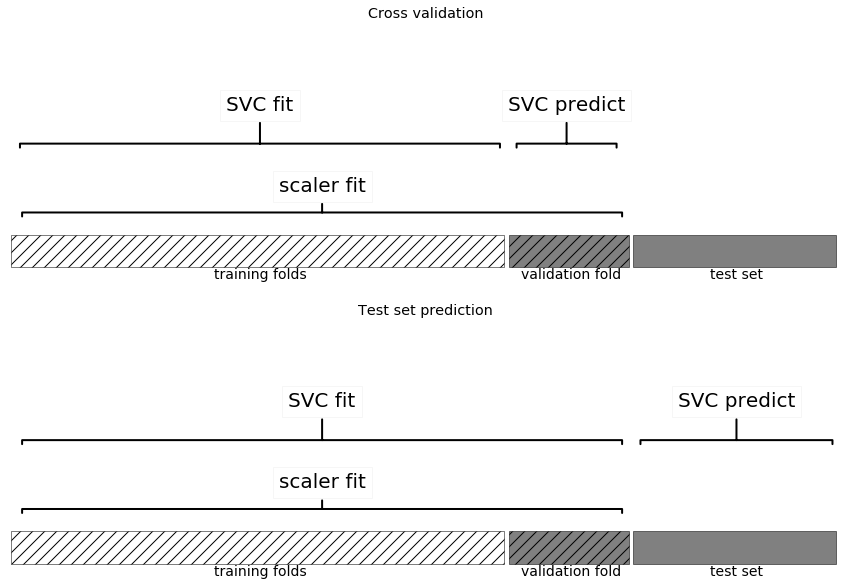

In [33]:
import mglearn
mglearn.plots.plot_improper_processing()

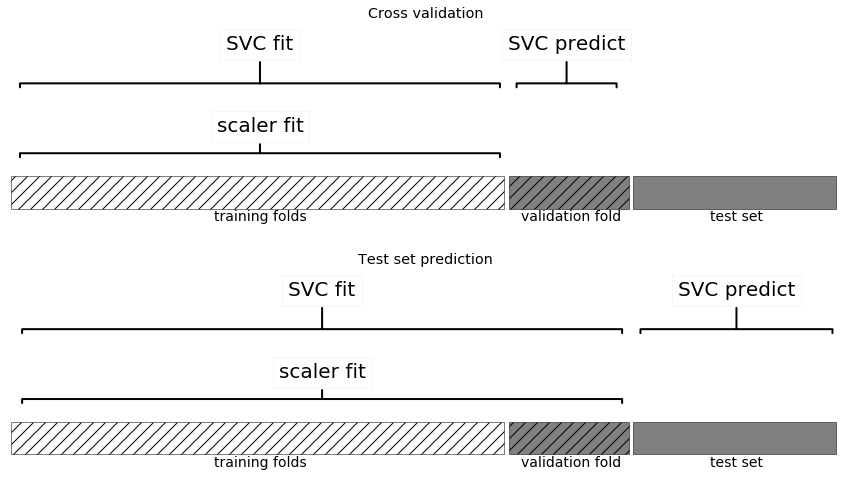

In [34]:
mglearn.plots.plot_proper_processing()

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


### Pipeline of transforms with a final estimator

- Inside pipeline we have tuples `('object name', function() )`

In [36]:
from sklearn.pipeline import Pipeline

pipe = Pipeline( steps = [ ('scaler', MinMaxScaler()), ('clf', LogisticRegression(solver = 'lbfgs', random_state = 42)) ] )

We see that this pipeline contains the parameters of both the scaler and the classifier. Sometimes, it can be tedious to give a name to each estimator in the pipeline. `make_pipeline` will give a name automatically to each estimator which is the lower case of the class name.

### Using make_pipeline to avoid choosing stepes (chosing names)

In [37]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline( MinMaxScaler(), LogisticRegression(solver = 'lbfgs', random_state = 42, max_iter = 5000)  )

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pipe2 = make_pipeline( MinMaxScaler(), PolynomialFeatures(degree = 2),
                           LogisticRegression(solver = 'lbfgs', random_state = 42, max_iter = 5000), verbose  = True   )

#### `verbose  = True` prints the time needed to execute each step of the pipeline

In [40]:
pipe.named_steps

{'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=5000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

The pipeline will have an identical API. We use `fit` to train the classifier and `score` to check the accuracy. However, calling `fit` will call the method `fit_transform` of all transformers in the pipeline. Calling `score` (or `predict` and `predict_proba`) will call internally `transform` of all transformers in the pipeline. 

In [41]:
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [42]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)

print(f"Accuracy of the model is: {pipe.__class__.__name__}: {accuracy:0.2f}" )

Accuracy of the model is: Pipeline: 0.96


In [43]:
pipe2.fit(X_train, y_train)
accuracy2 = pipe2.score(X_test, y_test)
print(f"Accuracy of the model is: {pipe.__class__.__name__}: {accuracy2:0.2f}" )

[Pipeline] ...... (step 1 of 3) Processing minmaxscaler, total=   0.0s
[Pipeline]  (step 2 of 3) Processing polynomialfeatures, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   4.1s
Accuracy of the model is: Pipeline: 0.99


### Showing the train set after scaling¶

In [44]:
np.set_printoptions(threshold=np.inf)
pipe.named_steps["minmaxscaler"].transform(X_train)[1]


array([0.    , 0.    , 0.    , 0.8125, 0.875 , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.8125, 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.125 , 1.    , 0.9375, 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.25  , 1.    , 0.875 , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.1875, 1.    , 0.6875, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.5   , 1.    , 0.625 , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 1.    , 0.4375, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.6875, 0.5625, 0.    , 0.    , 0.    ])

In [45]:
pipe2.named_steps['polynomialfeatures'].transform(X_train)[1]

array([  1.,   0.,   0.,   0.,  13.,  14.,   0.,   0.,   0.,   0.,   0.,
         0.,  13.,  16.,   3.,   0.,   0.,   0.,   0.,   2.,  16.,  15.,
         3.,   0.,   0.,   0.,   0.,   4.,  16.,  14.,   0.,   0.,   0.,
         0.,   0.,   3.,  16.,  11.,   0.,   0.,   0.,   0.,   0.,   8.,
        16.,  10.,   0.,   0.,   0.,   0.,   0.,   6.,  16.,   7.,   0.,
         0.,   0.,   0.,   0.,   1.,  11.,   9.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

We can check all the parameters of the pipeline using `get_params()`.

In [46]:
pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=5000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=5000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'logisticregression__C': 1.0,
 'l

### 2.4 Exercise

Reuse the breast dataset of the first exercise to train a `SGDClassifier` which you can import from `linear_model`. Make a pipeline with this classifier and a `StandardScaler` transformer imported from `sklearn.preprocessing`. Train and test this pipeline.

In [47]:
X_b.shape

(569, 30)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier

In [49]:
pipe_b = make_pipeline( StandardScaler(), PolynomialFeatures(degree = 2), SGDClassifier())

In [50]:
X_train_b.shape , y_train_b.shape

((398, 30), (398,))

In [51]:
pipe_b.fit(X_train_b, y_train_b)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [52]:
y_pred_b = pipe_b.predict(X_test_b)
y_pred_proba_b = pipe_b.decision_function(X_test_b)

In [53]:
print(f"The balanced accuracy score is      {balanced_accuracy_score(y_test_b, y_pred_b):0.3f}")
print(f"The mean accuracy accuracy score is {pipe_b.score(X_test_b, y_test_b):0.3f}")

The balanced accuracy score is      0.928
The mean accuracy accuracy score is 0.930


In [54]:
from sklearn.svm import SVC

pipe_b2 = make_pipeline(StandardScaler(), SVC(probability = True) )
pipe_b2.fit(X_train_b, y_train_b)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [55]:
y_pred_proba_b2 = pipe_b2.predict_proba(X_test_b)[:,1]
y_pred_b2= pipe_b2.predict(X_test_b)

print(f"The balanced accuracy score is {balanced_accuracy_score(y_test_b, y_pred_b2):0.3f}")
print(f"The mean accuracy score is     {pipe_b.score(X_test_b, y_test_b):0.3f}")
print(f"The AUC score is               {roc_auc_score(y_test_b, y_pred_proba_b2):0.3f}")

The balanced accuracy score is 0.950
The mean accuracy score is     0.930
The AUC score is               0.993


## 2.5 Interactions and polynomials

In [56]:
from sklearn.datasets import load_boston

boston = load_boston()
X_train2, X_test2, y_train2, y_test2 = train_test_split(boston.data, boston.target, random_state = 0)


In [57]:
y_train2[:10]

array([18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4, 35.4, 24. ])

### This is a Regression problem

### Scale the data before adding polynomial features

In [58]:
scaler = MinMaxScaler()
X_train2_Scaled = scaler.fit_transform(X_train2)
X_test2_Scaled = scaler.transform(X_test2)

### Adding polynomial features

In [59]:
poly = PolynomialFeatures(degree = 2)
X_train2_poly = poly.fit_transform(X_train2_Scaled)
X_test2_poly = poly.transform(X_test2_Scaled)
print(f" X_train: {X_train2.shape}")
print(f" X_test.shape: {X_train2_poly.shape}")

 X_train: (379, 13)
 X_test.shape: (379, 105)


In [60]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train2_Scaled, y_train2)
print(f" Score after scaling: {ridge.score(X_test2_Scaled, y_test2) : 0.3f}")

ridge = Ridge().fit(X_train2_poly, y_train2)
print(f" Score after scaling and adding polynomail features: {ridge.score(X_test2_poly, y_test2): 0.3f}")

 Score after scaling:  0.621
 Score after scaling and adding polynomail features:  0.753


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train2_Scaled, y_train2)

print(f"  Score after scaling: {rf.score(X_test2_Scaled, y_test2) : 0.3f}")

rf = RandomForestRegressor(n_estimators=100).fit(X_train2_poly, y_train2)

print(f" Score after scaling and adding polynomail features: {rf.score(X_test2_poly, y_test2): 0.3f}")

  Score after scaling:  0.805
 Score after scaling and adding polynomail features:  0.789


## 3. When more is better than less: cross-validation instead of single split

Splitting the data is necessary to evaluate the statistical model performance. However, it reduces the number of samples which can be used to learn the model. Therefore, one should use cross-validation whenever possible. Having multiple splits will give information about the model stability as well. 

### 3.1. How to split

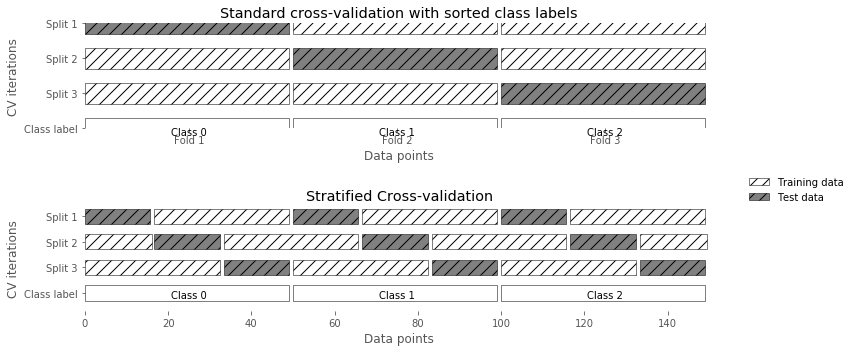

In [63]:
mglearn.plots.plot_stratified_cross_validation()

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### It's a multiclass classification problem (with 3 classes)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3)
logreg = LogisticRegression(max_iter = 5000)
scores  = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print( f'cross val score: {scores}' )

cross val score: [0. 0. 0.]


### The above kfold doesn't shuffle or stritify data so all the folds include only one class of data

In [66]:
kfold = KFold(n_splits = 5)
logreg = LogisticRegression(max_iter = 5000, multi_class= 'auto')
scores  = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print( f'cross val score: {np.round(scores, 3)}' )

cross val score: [1.    1.    0.867 0.933 0.833]


### In the next cell we change the metrics for scoring and set it to `scoring='roc_auc_ovr'` to find  `auc` of a multiclass classification

In [67]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5, scoring='roc_auc_ovr')
np.round(scores, 3)

array([0.993, 1.   , 0.997, 0.993, 1.   ])

### shuffle:

- is pure random and doesn't sustain the distribution inside each class

In [68]:
kfold = KFold(n_splits = 3, shuffle = True , random_state=0)

print(f'cross val score: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

cross val score: [0.98 0.96 0.96]


## cv:
- specifties number of folds and automatically stratifies the data

- The best one

In [69]:
print(f'cross val score: {cross_val_score(logreg, iris.data, iris.target, cv = 3)} ' )

cross val score: [0.98 0.96 0.98] 


### StratifiedKFold

- The folds are made by preserving the percentage of samples for each class.

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
kfold = StratifiedKFold(n_splits = 3)
sc  = cross_val_score(logreg, iris.data, iris.target, cv=kfold, scoring='roc_auc_ovr')
print(f'cross val score: {np.round(sc, 3)}')

cross val score: [0.998 0.996 0.998]


### Leave-one-out cross-validation:

- Special case of Kfolds where in each iteration only one sample is used as test and all other samples used as train

- K here is equals the number of samples

In [71]:
%%time
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()#Instead of Kfold

logreg = LogisticRegression(max_iter = 10000)
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(f'cross val score: {scores}')
print(f'mean accuracy: {scores.mean() : 0.2f}')
print(f'number of iteration: {len(scores)}')

cross val score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
mean accuracy:  0.97
number of iteration: 150
Wall time: 4.13 s


#### Shuffle-split cross-validation:

- In each iteration we choose only a sample of data as train and test

- Only use when data is too large and you have limited time

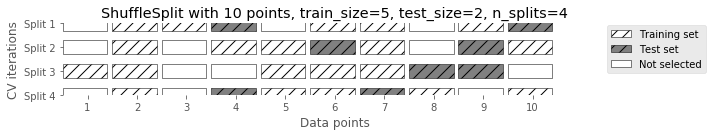

In [72]:
mglearn.plots.plot_shuffle_split()

In [73]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits= 10, test_size= 0.5, train_size = 0.5)#Instead of KFold

scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print(f'cross val score: {np.round(scores, 3)}')
print(f'mean accuracy: {scores.mean() : 0.2f}')

cross val score: [0.96  0.853 0.933 0.96  0.973 0.947 0.947 0.947 0.96  0.973]
mean accuracy:  0.95


### Cross-validation with groups:

- Groups here refers to X

- In each iteration, one group is in test and others in train

- The same group will not appear in two different folds 

- The number of distinct groups has to be at least equal to the number of folds

- read more here: http://yaoyao.codes/sklearn/2018/01/25/scikit-learn-a-walk-through-of-groupkfoldsplit

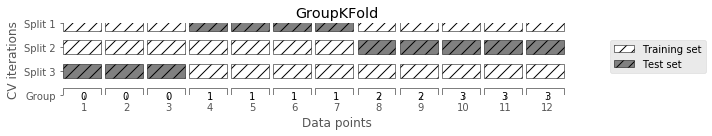

In [74]:
mglearn.plots.plot_group_kfold()

In [75]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold
x3,y3 = make_blobs( n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, x3, y3, groups,  cv=GroupKFold(n_splits= 3))
print(f'cross val score: {scores}')

cross val score: [0.75       0.6        0.66666667]


### 3.2 Back to the example

`scikit-learn` provides three functions: `cross_val_score`, `cross_val_predict`, and [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). The latter provides more information regarding fitting time, training and testing scores. It can also return multiple scores at once.

In [76]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(), LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42))

scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

Using the cross-validate function, we can quickly check the training and testing scores and make a quick plot using `pandas`.

### Convert the result into a dataframe

In [77]:
import pandas as pd
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.278262,0.000992,0.926544,0.988314
1,0.227392,0.000997,0.943239,0.984975
2,0.213434,0.000991,0.924875,0.993322


In [78]:
df_scores.mean()

fit_time       0.239696
score_time     0.000994
test_score     0.931553
train_score    0.988870
dtype: float64

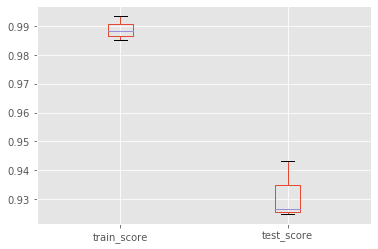

In [79]:
df_scores[['train_score', 'test_score' ]].boxplot()

###  If 2 numbers are close and high:

> Bravo, you did a good job!

### If 2 numbers are close and low:

> *Underfitting*, we need to create a more complex model or add more features

### If 2 numbers gap is too large:

> *Overfitting*, reduce the complexity(features) by regularization or include more data

### 3.3 Exercise

Use the pipeline of the previous exercise and make a cross-validation instead of a single split evaluation.

In [80]:
pipe_b = make_pipeline( StandardScaler(), PolynomialFeatures(degree = 2), SGDClassifier(max_iter=1000))
pipe_b.get_params


<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)>

In [81]:
X_b.shape,

((569, 30),)

In [82]:
scores_b = cross_validate(pipe_b, X_b, y_b, cv = 5, return_train_score=True, scoring= 'roc_auc' )
print(f'cross val score for boston dataset: {scores_b}')

cross val score for boston dataset: {'fit_time': array([0.02393103, 0.02194071, 0.01694846, 0.0129652 , 0.01495886]), 'score_time': array([0.00199318, 0.00199556, 0.00397897, 0.00299215, 0.0029943 ]), 'test_score': array([0.98919096, 0.99050115, 0.97420635, 0.9781746 , 0.99329309]), 'train_score': array([1.        , 0.99977242, 1.        , 1.        , 1.        ])}


In [83]:
import pandas as pd
df_scores_b = pd.DataFrame(scores_b)
df_scores_b

,fit_time,score_time,test_score,train_score
0,0.023931,0.001993,0.989191,1.000000
1,0.021941,0.001996,0.990501,0.999772
2,0.016948,0.003979,0.974206,1.000000
3,0.012965,0.002992,0.978175,1.000000
4,0.014959,0.002994,0.993293,1.000000


In [84]:
df_scores_b.mean()

fit_time       0.018149
score_time     0.002791
test_score     0.985073
train_score    0.999954
dtype: float64

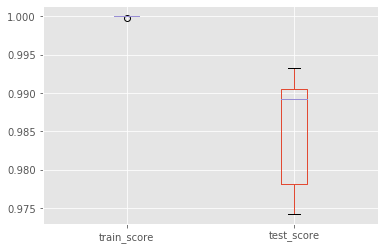

In [85]:
df_scores_b[['train_score', 'test_score' ]].boxplot()

## 4. Hyper-parameters optimization: fine-tune the inside of a pipeline

Sometimes you would like to find the parameters of a component of the pipeline which lead to the best accuracy. We already saw that we could check the parameters of a pipeline using `get_params()`.

Hyper-parameters can be optimized by an exhaustive search. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) provides such utility and does a cross-validated grid-search over a parameter grid.

Let's give an example in which we would like to optimize the `C` and `penalty` parameters of the `LogisticRegression` classifier.

In [86]:
(X_train[1], y_train[1])

(array([ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.]), 1)

### This is a multiclass classification problem

In [87]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline

pipe = make_pipeline( MinMaxScaler(), LogisticRegression(solver = 'saga', multi_class='auto', max_iter = 5000, random_state = 42) )

param_grid = {'logisticregression__C' : [0.1, 1, 10],\
               'logisticregression__penalty' : ['l2', 'l1'] }

grid = GridSearchCV(pipe, param_grid, cv = 3, n_jobs=-1, return_train_score = True #, scoring='roc_auc_ovr'
                   )
# scoring='roc_auc_ovr' bacuse it's a multiclass classification

grid.fit(X_train, y_train) #grid is the new classifier higher level than pipe


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=5000,
                                                           multi_class='auto',
                                                           

### Upto here, everything is done on train data

When fitting the grid-search object, it finds the best possible parameter combination on the training set (using cross-validation). We can introspect the results of the grid-search by accessing the attribute `cv_results_`. It allows us to check the effect of the parameters on the model performance.

In [88]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid.sort_values(by=['rank_test_score']).set_index('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,
1,2.009624,0.196453,0.000997,1.123916e-07,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.977728,0.964365,0.964365,0.968820,0.006299,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.749660,0.022601,0.000998,8.147827e-04,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.979955,0.955457,0.957684,0.964365,0.011061,0.984410,0.988864,0.986637,0.986637,0.001818
3,8.765901,0.761393,0.001000,7.370010e-07,10,l1,"{'logisticregression__C': 10, 'logisticregress...",0.973274,0.957684,0.951002,0.960653,0.009332,1.000000,1.000000,1.000000,1.000000,0.000000
4,3.237671,0.471431,0.001330,4.700217e-04,1,l1,"{'logisticregression__C': 1, 'logisticregressi...",0.964365,0.951002,0.944321,0.953229,0.008333,0.977728,0.978842,0.982183,0.979584,0.001893
5,0.234372,0.008808,0.001330,4.701903e-04,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.953229,0.935412,0.942094,0.943578,0.007349,0.953229,0.957684,0.952116,0.954343,0.002406
6,0.619676,0.108198,0.000000,0.000000e+00,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.886414,0.906459,0.884187,0.892353,0.010015,0.903118,0.902004,0.902004,0.902376,0.000525


By default, the grid-search object is also behaving as an estimator. Once it is fitted, calling `score` will fix the hyper-parameters to the best parameters found.

In [89]:
param_grid

{'logisticregression__C': [0.1, 1, 10],
 'logisticregression__penalty': ['l2', 'l1']}

### But we might missed the best parameters, so we should check if the range of given parameters is te best

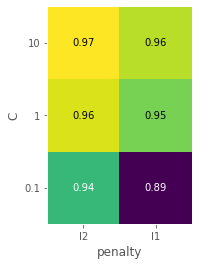

In [90]:
import numpy as np
scores = np.array(df_grid.mean_test_score).reshape(3, 2)
mglearn.tools.heatmap(scores, xlabel='penalty', xticklabels=param_grid['logisticregression__penalty'],\
                     ylabel='C', yticklabels= param_grid['logisticregression__C'], cmap = 'viridis')

### Best result should be inte middle of heat map not in boundries

- The lightest color is the best

- It means that if we increase $C$ we may get better result

In [91]:
grid.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

### We can see `grid.best_params_` only after we fit grid `grid.fit(X_train, y_train)`

In [92]:
grid.estimator

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [93]:
print("Logistic regression step:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [94]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[ 0.         -0.10387678  0.09781757  0.6751041   0.16744981 -0.89185937
  -0.92687031 -0.11932107 -0.0036821  -0.41928546  0.22061184  1.16619671
   0.40050103  0.79545801 -0.34101296 -0.14797988 -0.00000583  0.2545944
   0.99513638 -0.48017517 -2.19413919  0.78584929  0.60342894 -0.06205273
  -0.00005186  1.00543208  1.01228546 -1.16056001 -3.54449354 -0.17672864
   1.02753233 -0.02667156  0.          1.50415368  0.58804709 -1.56131655
  -2.89806723  0.3926555   0.75766164  0.         -0.02687509  0.10145055
   1.65605414 -0.69580925 -1.48416258  0.85948789  0.30621346 -0.00140979
  -0.02335471 -0.5196659   0.77669417 -0.18833145  1.00322504  0.37064346
  -0.30226604 -0.03216873 -0.00016151 -0.02397305 -0.13540951  0.80520284
  -0.33967314 -0.32212458 -0.51444613 -0.10466433]
 [ 0.         -0.03700488 -0.20599121  0.89598942 -3.76944417  1.83141282
   0.29629425 -0.03706116 -0.11616661 -2.42776472 -3.26932681 -0.85061059
   0.88263868  1.12271261 -2

Besides this is possible to call the grid-search as any other classifier to make predictions.

In [95]:
accuracy = grid.score(X_test, y_test)
print(f'Accuracy score of the {grid.__class__.__name__} is {accuracy:.2f}')

Accuracy score of the GridSearchCV is 0.96


### What about AUC?


In [96]:
y_pred = grid.predict(X_test)
y_pred
#this is a multiclass classification with 10 classes( number from 0-9)

array([8, 0, 9, 1, 5, 6, 7, 8, 1, 5, 5, 9, 2, 2, 7, 6, 5, 4, 8, 6, 9, 4,
       0, 6, 0, 1, 2, 0, 4, 7, 3, 3, 8, 7, 4, 6, 5, 1, 5, 5, 4, 0, 8, 8,
       5, 8, 4, 3, 0, 7, 2, 5, 1, 2, 1, 1, 4, 4, 9, 5, 2, 5, 4, 9, 0, 2,
       4, 1, 7, 9, 6, 1, 8, 5, 4, 3, 4, 4, 3, 6, 1, 0, 1, 2, 3, 7, 7, 2,
       9, 6, 5, 8, 2, 6, 7, 5, 9, 7, 0, 5, 0, 3, 1, 9, 2, 4, 6, 5, 1, 0,
       0, 9, 5, 8, 4, 2, 8, 4, 1, 4, 0, 0, 7, 5, 7, 1, 3, 4, 2, 7, 2, 6,
       9, 7, 0, 0, 1, 6, 3, 5, 1, 6, 0, 9, 6, 7, 4, 1, 6, 6, 7, 5, 8, 8,
       3, 4, 4, 9, 0, 2, 9, 0, 9, 6, 0, 7, 6, 4, 4, 6, 7, 7, 4, 6, 9, 7,
       4, 3, 5, 2, 0, 8, 4, 5, 8, 3, 5, 7, 8, 3, 9, 8, 6, 2, 9, 4, 2, 1,
       9, 9, 8, 9, 2, 5, 1, 0, 9, 3, 0, 4, 4, 9, 5, 3, 3, 6, 3, 1, 0, 6,
       7, 1, 6, 9, 6, 3, 2, 3, 0, 4, 8, 1, 5, 5, 9, 3, 4, 2, 1, 8, 9, 3,
       9, 5, 2, 2, 3, 5, 6, 0, 4, 2, 2, 8, 8, 1, 3, 0, 9, 6, 8, 0, 3, 3,
       1, 1, 4, 8, 8, 9, 1, 7, 6, 2, 1, 0, 2, 3, 9, 7, 7, 7, 9, 2, 5, 9,
       5, 7, 3, 5, 9, 7, 1, 8, 0, 4, 2, 3, 1, 7, 2,

In [97]:
y_pred_proba = grid.predict_proba(X_test)
#this is a multiclass classification with 10 classes( number from 0-9)

In [98]:
y_pred_proba[0]

array([0.00035576, 0.16898809, 0.00015503, 0.00000193, 0.00456535,
       0.16314427, 0.07488616, 0.00291393, 0.58497931, 0.00001017])

### As you can see in the cell above which is the first row of `y_pred_proba`, the highest probability is `0.584` which is the 9th elenment of the array which belongs to class 8.

> It can be verified by looking at 1st elemnt in `y_pred`

In [99]:
scores  = met.roc_auc_score(y_test, y_pred_proba, multi_class = 'ovo')
print(f'AUC score of the {grid.__class__.__name__} is {scores:.3f}')

AUC score of the GridSearchCV is 0.999


Up to know, we only make the fitting of the grid-search on a single split. However, as previously stated, we might be interested to make an outer cross-validation to estimate the performance of the model and different sample of data and check the potential variation in performance. Since grid-search is an estimator, we can use it directly within the `cross_validate` function.

### Nested Cross Validation

In [102]:
scores = cross_validate(grid, X, y, cv= 3, return_train_score=True, scoring = 'roc_auc_ovr')
df_scores = pd.DataFrame(scores)
df_scores

#scoring = 'roc_auc_ovr' because it's a multiclass classification

,fit_time,score_time,test_score,train_score
0,19.316322,0.006982,0.996845,0.999727
1,19.312306,0.009001,0.997690,0.999998
2,15.734939,0.007981,0.993775,0.999953


In [103]:
df_scores.mean()

fit_time       18.121189
score_time      0.007988
test_score      0.996104
train_score     0.999893
dtype: float64

,fit_time,score_time,test_score,train_score
0,19.316322,0.006982,0.996845,0.999727
1,19.312306,0.009001,0.997690,0.999998
2,15.734939,0.007981,0.993775,0.999953


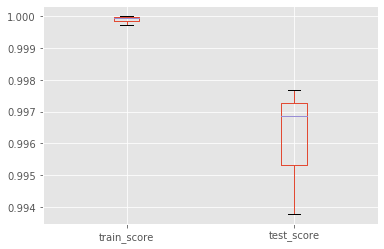

In [104]:
df_scores[['train_score', 'test_score' ]].boxplot()
df_scores

### The result might be overly optimestic  

- And it's very time consuming

In [106]:
scored = cross_validate(grid, X, y, cv = 3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,19.316322,0.006982,0.996845,0.999727
1,19.312306,0.009001,0.997690,0.999998
2,15.734939,0.007981,0.993775,0.999953


## 4.2 Grid-searching preprocessing steps and model parameters

In [107]:
boston = load_boston()
X_train2, X_test2, y_train2, y_test2 = train_test_split(boston.data, boston.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [108]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [109]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

In [110]:
pipe.fit(X_train2, y_train2)
pipe.named_steps['polynomialfeatures'].transform(X_train2)[1]

array([     1.        ,      0.10328   ,     25.        ,      5.13      ,
            0.        ,      0.453     ,      5.927     ,     47.2       ,
            6.932     ,      8.        ,    284.        ,     19.7       ,
          396.9       ,      9.22      ,      0.01066676,      2.582     ,
            0.5298264 ,      0.        ,      0.04678584,      0.61214056,
            4.874816  ,      0.71593696,      0.82624   ,     29.33152   ,
            2.034616  ,     40.991832  ,      0.9522416 ,    625.        ,
          128.25      ,      0.        ,     11.325     ,    148.175     ,
         1180.        ,    173.3       ,    200.        ,   7100.        ,
          492.5       ,   9922.5       ,    230.5       ,     26.3169    ,
            0.        ,      2.32389   ,     30.40551   ,    242.136     ,
           35.56116   ,     41.04      ,   1456.92      ,    101.061     ,
         2036.097     ,     47.2986    ,      0.        ,      0.        ,
            0.        ,  

In [111]:
grid.cv_results_['mean_test_score']

array([   0.72191576,    0.72191928,    0.72195409,    0.72226561,
          0.72332595,    0.70795164,    0.76017083,    0.75944841,
          0.76665145,    0.79496682,    0.82872614,    0.80483266,
       -581.09520245, -160.89875061,  -13.19728585,   -0.03179335,
          0.64834057,    0.65408303])

In [112]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

# <font color='red'>**Attention!**</font>

These info above is for train set(even `mean_test_score` is for cross validation fold in train set) because upto here we've never given test data to the model! 

### We had 18 combination of parameters in grid

- 3 for degree, 6 for $alpha$

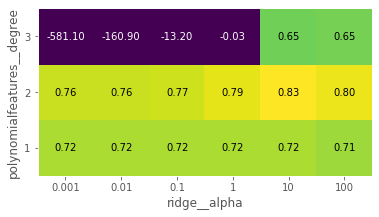

In [113]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

### The best one is 0.83 which is in the middle so no need to change the range of parameters

In [114]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [115]:
print("Test-set score: {:.2f}".format(grid.score(X_test2, y_test2)))

Test-set score: 0.77


### How about no polynomial features?

In [116]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train2, y_train2)
print("Score without poly features: {:.2f}".format(grid.score(X_test2, y_test2)))

Score without poly features: 0.63


scored = cross_validate(grid, X, y, cv = 3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

###  Exercise



### Let's first try SVM

- Note that `LinearSVM` doesn't support `roc_auc` so we have to use `SVC` and set `probability=True`  

In [117]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler

pipe_b = make_pipeline(StandardScaler(), SVC(probability=True) )

param_grid = { 'standardscaler' : [MinMaxScaler(), RobustScaler()],
              'svc__C' : [ 10, 20, 50],
              'svc__gamma' : [0.008,0.01, 0.1]}, 
grid_b = GridSearchCV( pipe_b, param_grid, cv = 3, n_jobs=-1, return_train_score = True ,scoring= 'roc_auc' )
grid_b.fit(X_train_b, y_train_b)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True...
                                            

### Reuse the previous pipeline for the breast dataset and make a grid-search to evaluate the difference between a `hinge` and `log` loss. Besides, fine-tune the `penalty`.

In [118]:
pipe_b1 = make_pipeline( StandardScaler(), PolynomialFeatures(degree = 2), SGDClassifier())

In [119]:
param_grid = {'sgdclassifier__loss': ['hinge', 'log'],
            'sgdclassifier__penalty' : ['l2', 'l1']}
grid_b1 = GridSearchCV(pipe_b1, param_grid, cv = 3, return_train_score=True, n_jobs=-1)
grid_b1.fit(X_train_b, y_train_b)
df_grid_b1= pd.DataFrame(grid_b.cv_results_)
df_grid_b1.sort_values(by=['rank_test_score']).set_index('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_standardscaler,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,
1,0.018284,1.316370e-02,0.002327,1.243667e-03,"MinMaxScaler(copy=True, feature_range=(0, 1))",20,0.01,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.994169,0.992530,0.999754,0.995484,0.003092,0.994949,0.998656,0.992621,0.995409,0.002485
2,0.009309,1.244304e-03,0.002327,4.710332e-04,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.01,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.993440,0.992771,0.999754,0.995322,0.003146,0.994584,0.997984,0.990988,0.994519,0.002856
3,0.007643,9.430895e-04,0.002327,4.704713e-04,"MinMaxScaler(copy=True, feature_range=(0, 1))",20,0.008,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.993197,0.993012,0.999508,0.995239,0.003020,0.995071,0.998717,0.992379,0.995389,0.002597
4,0.009639,1.250819e-03,0.002988,3.146965e-06,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.008,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.992954,0.992530,0.999508,0.994998,0.003194,0.994280,0.997556,0.990746,0.994194,0.002781
5,0.006981,8.141016e-04,0.001997,3.104532e-06,"MinMaxScaler(copy=True, feature_range=(0, 1))",50,0.008,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.994655,0.989880,0.999508,0.994681,0.003931,0.995010,0.998839,0.993407,0.995752,0.002279
6,0.006315,4.690668e-04,0.001995,4.052337e-07,"MinMaxScaler(copy=True, feature_range=(0, 1))",50,0.01,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.992954,0.989398,0.999262,0.993871,0.004079,0.995071,0.998961,0.993407,0.995813,0.002327
7,0.005653,4.708690e-04,0.001993,2.480266e-06,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.1,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.994169,0.987711,0.999508,0.993796,0.004823,0.995254,0.999572,0.994012,0.996279,0.002383
8,0.006316,1.244496e-03,0.001335,4.776082e-04,"MinMaxScaler(copy=True, feature_range=(0, 1))",20,0.1,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.994169,0.987229,0.999262,0.993553,0.004932,0.995984,0.999572,0.994556,0.996704,0.002110
9,0.005651,9.406616e-04,0.011636,1.363445e-02,"MinMaxScaler(copy=True, feature_range=(0, 1))",50,0.1,"{'standardscaler': MinMaxScaler(copy=True, fea...",0.993440,0.986988,0.998525,0.992984,0.004721,0.997140,0.999694,0.996250,0.997695,0.001460


In [120]:
X_test_b.shape

(171, 30)

In [121]:
grid_b1.best_params_

{'sgdclassifier__loss': 'log', 'sgdclassifier__penalty': 'l2'}

### If we want to add loos functions in cross validate

### Hinge Loss:

`h_loss  = hinge_loss(y_test, pred_decision)`

`y_pred_decision = clf.decision_function(X_test)`

In [122]:
y_pred_decision_b = grid_b.decision_function(X_test_b)
y_pred_decision_b.shape

(171,)

In [123]:
from sklearn.metrics import hinge_loss

hinge_loss_b = hinge_loss(y_test_b, y_pred_decision_b)
hinge_loss_b

0.1465217929416306

### Log Loss:

`l_loss = log_loss(y_test, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)`

`y_pred = clf.predict(X_test)`

In [124]:
y_pred_b = grid_b.predict(X_test_b)
y_pred_b.shape

(171,)

In [125]:
from sklearn.metrics import log_loss

log_loss_b = log_loss(y_test_b, y_pred_b)
log_loss_b

1.41389609560793

### Also we can add these Loss Functions into the gridsearch to rate the models based on different Loss functions

In [126]:
from sklearn.metrics import fbeta_score, make_scorer

pipe_b1 = make_pipeline( StandardScaler(), PolynomialFeatures(degree = 2), SGDClassifier())

scoring_list = {'Hinge Loss': make_scorer(hinge_loss), 
                'Log Loss': make_scorer(log_loss)}

param_grid = {'sgdclassifier__loss': ['hinge', 'log'],
              'sgdclassifier__penalty' : ['l2', 'l1']}

grid_b = GridSearchCV(pipe_b1, param_grid, cv = 3, return_train_score=True, scoring = scoring_list, refit='Hinge Loss' , n_jobs=-1)

grid_b.fit(X_train_b, y_train_b)

df_grid_b= pd.DataFrame(grid_b.cv_results_)
df_grid_b

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdclassifier__loss,param_sgdclassifier__penalty,params,split0_test_Hinge Loss,split1_test_Hinge Loss,split2_test_Hinge Loss,...,split1_test_Log Loss,split2_test_Log Loss,mean_test_Log Loss,std_test_Log Loss,rank_test_Log Loss,split0_train_Log Loss,split1_train_Log Loss,split2_train_Log Loss,mean_train_Log Loss,std_train_Log Loss
0,0.007979,0.001411,0.002660,0.000471,hinge,l2,"{'sgdclassifier__loss': 'hinge', 'sgdclassifie...",0.413534,0.413534,0.401515,...,1.298480,1.046636,1.301093,0.208839,4,9.992007e-16,9.992007e-16,9.992007e-16,9.992007e-16,0.000000
1,0.017951,0.003732,0.002661,0.000470,hinge,l1,"{'sgdclassifier__loss': 'hinge', 'sgdclassifie...",0.428571,0.406015,0.401515,...,1.038784,1.046636,1.387653,0.487833,3,9.992007e-16,9.992007e-16,9.992007e-16,9.992007e-16,0.000000
2,0.010638,0.000940,0.004331,0.002060,log,l2,"{'sgdclassifier__loss': 'log', 'sgdclassifier_...",0.466165,0.421053,0.401515,...,1.558170,1.046636,1.993606,0.999567,1,2.606760e-01,9.992007e-16,9.992007e-16,8.689202e-02,0.122884
3,0.024268,0.007115,0.002328,0.000470,log,l1,"{'sgdclassifier__loss': 'log', 'sgdclassifier_...",0.436090,0.413534,0.424242,...,1.298474,1.831620,1.822443,0.424122,2,9.992007e-16,9.992007e-16,9.992007e-16,9.992007e-16,0.000000


In [127]:
grid_b1.best_params_

{'sgdclassifier__loss': 'log', 'sgdclassifier__penalty': 'l2'}

## 4.3 Grid-Search to evaluate different models

In [128]:
from sklearn.svm import SVC
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
#Inside Pipleline is a list of tuples

In [129]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 
     'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 
     'classifier__max_features': [1, 2, 3]}]

In [130]:
X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(X_b, y_b, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5 , n_jobs=-1 )
grid.fit(X_breast_train, y_breast_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_breast_test, y_breast_test)))

Best params:
{'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.99
Test-set score: 0.98


### Another Example:

- gridsearch with multiple classifiers

In [131]:
pipe = Pipeline([('preprocessing', StandardScaler() ),
                 ('preprocessing2', PolynomialFeatures()),
                 ('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver = 'saga', max_iter = 1000)],
                 'preprocessing': [StandardScaler(), RobustScaler()], 
                 'preprocessing2__degree' : [2,3,4],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'preprocessing2__degree' : [2,3,4],
                 'classifier__n_estimators': [10, 100, 200],
                 'classifier__max_features': [1, 2, 3]}]
#search_space is a list of 2 elements which each element is a dictionary

In [132]:
clf = GridSearchCV(pipe, search_space, cv=3, verbose=0 , n_jobs=-1)

In [137]:
best_model = clf.fit(X_train_b, y_train_b)

best_model.best_estimator_.get_params()['classifier']

In [ ]:
clf.best_params_

In [ ]:
df_grid_e= pd.DataFrame(best_model.cv_results_)
df_grid_e

### More options to choose from:

In [ ]:
pipe_t = Pipeline([('preprocessing', MinMaxScaler() ),
                 ('preprocessing2', PolynomialFeatures()),
                  ('classifier', SVC()) ])


param_grid = [
    {'classifier': [SVC()],
     'preprocessing': [StandardScaler(), RobustScaler()], 
     'preprocessing2__degree' : [2,3,4],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [StandardScaler(), RobustScaler()], 
     'preprocessing2': [PolynomialFeatures()],
     'preprocessing2__degree' : [2,3,4],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_t = GridSearchCV(pipe_t, param_grid, cv=5, , n_jobs=-1)
grid_t.fit(X_train_b, y_train_b)
grid_t.best_params_

## 5. Summary: my scikit-learn pipeline in less than 10 lines of code (skipping the import statements)

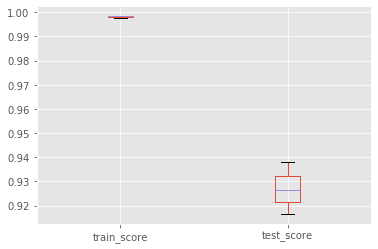

In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_validate


pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))

param_grid = {'minmaxscaler': [StandardScaler(), RobustScaler() ],
              'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)

scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

In [135]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=5000,
                                                           multi_class='auto',
                                                           

In [136]:
grid.best_params_

{'logisticregression__C': 1.0,
 'logisticregression__penalty': 'l2',
 'minmaxscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}